In [196]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.layers import LSTM
from tensorflow.keras .layers import GRU
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

In [88]:
url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
passageiros = pd.read_csv(url)

In [89]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

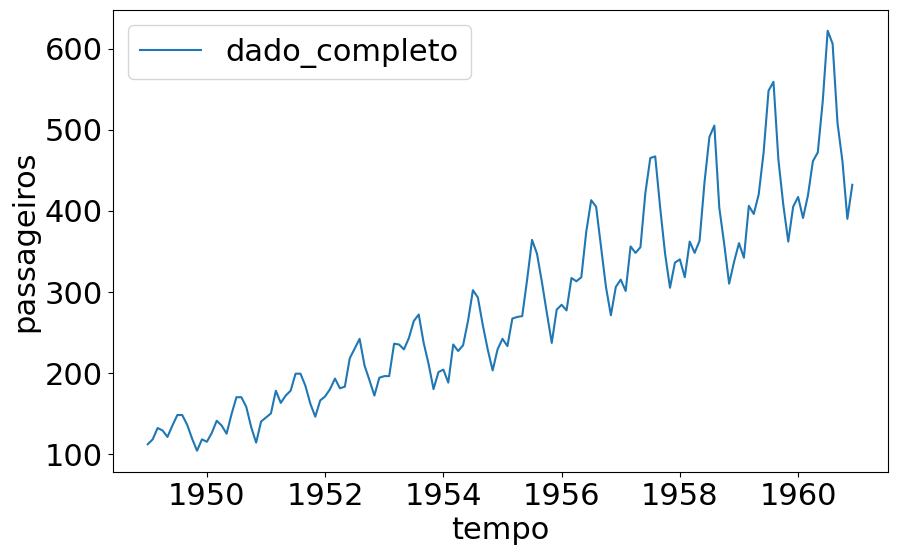

In [90]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [91]:
sc = StandardScaler()

In [92]:
sc.fit(passageiros)

StandardScaler()

In [93]:
dado_escalado = sc.transform(passageiros)

In [94]:
x = dado_escalado[:, 0]
y = dado_escalado[:, 1]

Text(0.5, 0, 'Data')

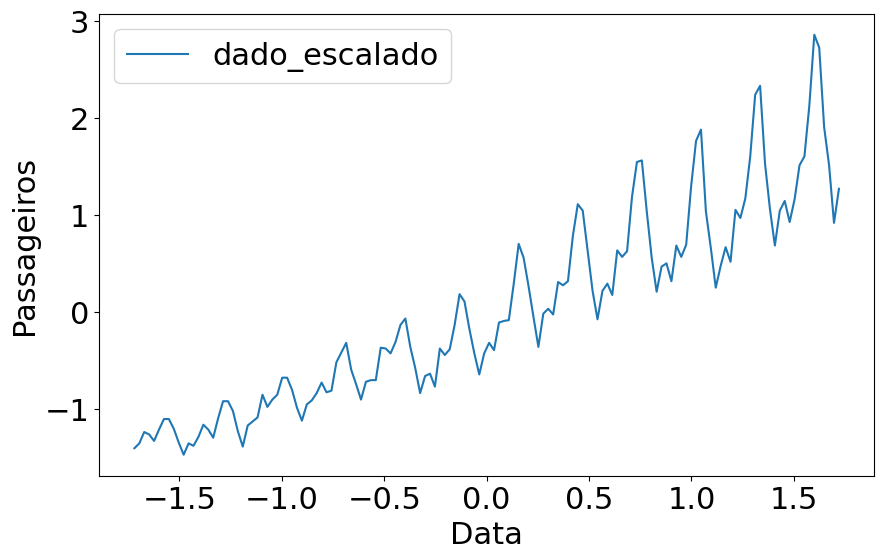

In [95]:
sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [96]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)- tamanho_treino

In [97]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

In [98]:
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

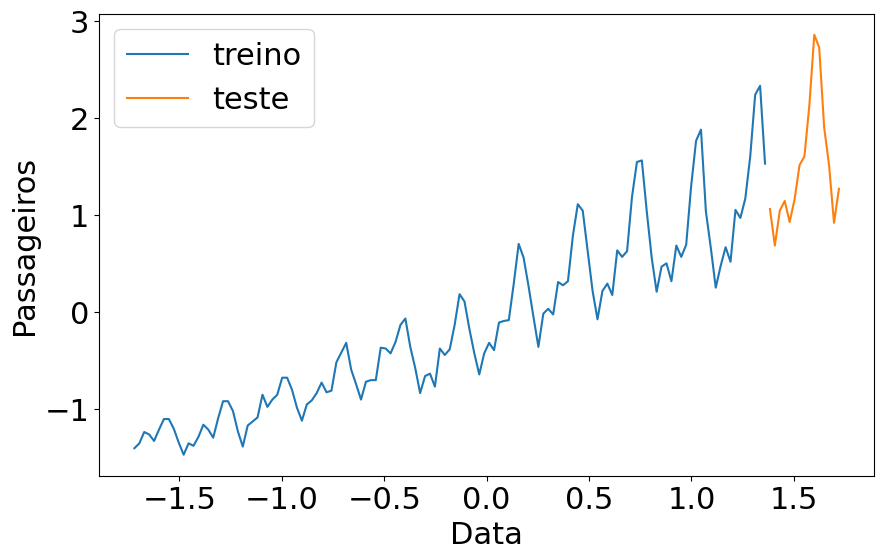

In [99]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [100]:
regressor = Sequential()

In [101]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

In [102]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [103]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1288


In [105]:
y_predict = regressor.predict(x_treino)

5/5 [==============================] - 0s 3ms/step


<Axes: >

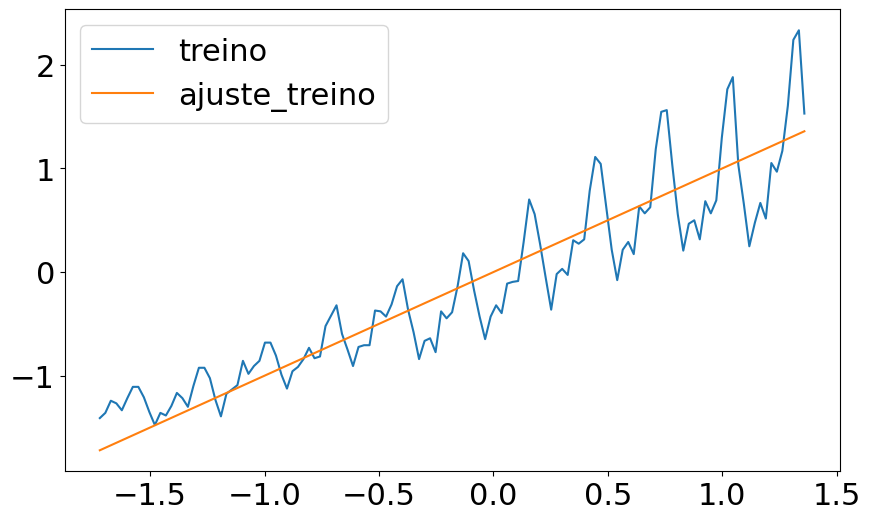

In [106]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_treino, y=y_predict[:, 0], label='ajuste_treino')

In [107]:
d ={'tempo': x_treino, 'passageiros': y_predict[:, 0]}

In [108]:
resultados = pd.DataFrame(data=d)

In [109]:
resultados

,tempo,passageiros
0,-1.720064,-1.718094
1,-1.696007,-1.694064
2,-1.671950,-1.670035
3,-1.647894,-1.646006
4,-1.623837,-1.621976
...,...,...
124,1.262984,1.261537
125,1.287041,1.285567
126,1.311098,1.309596
127,1.335155,1.333625


In [110]:
resultado_transf = sc.inverse_transform(resultados)

In [111]:
resultado_transf = pd.DataFrame(resultado_transf)

In [112]:
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

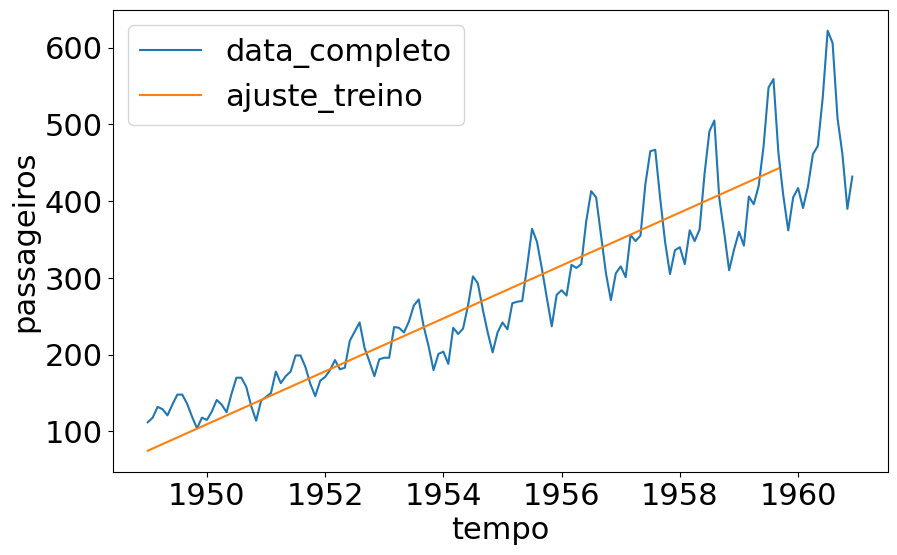

In [113]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='data_completo')
sns.lineplot(x='tempo', y='passageiros', data = resultado_transf, label='ajuste_treino')

In [114]:
y_predict_teste = regressor.predict(x_teste)

1/1 [==============================] - 0s 20ms/step


In [115]:
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:, 0]}
resultados_teste = pd.DataFrame(data=d)

In [116]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [117]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [118]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

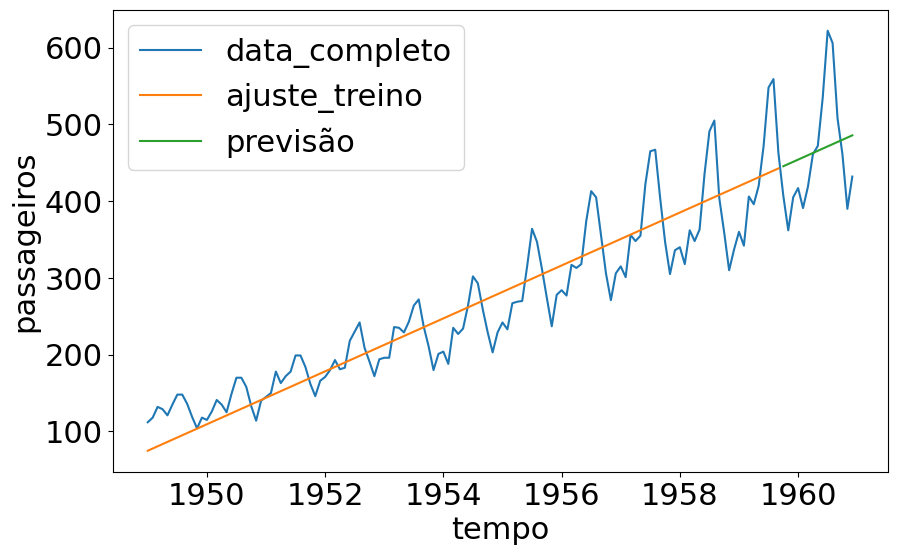

In [119]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='data_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

In [120]:
regressor2 = Sequential()

In [121]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [122]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [123]:
regressor2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 8         
                                                                 
 dense_12 (Dense)            (None, 8)                 64        
                                                                 
 dense_13 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
regressor2.fit(x_treino, y_treino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8244
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8156
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8134
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8115
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8087
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8061
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8028
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7993
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7968
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7932
Epoch 11/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7904
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7889
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [125]:
y_predict = regressor2.predict(x_treino)

5/5 [==============================] - 0s 3ms/step


In [126]:
y_predict_teste = regressor2.predict(x_teste)

1/1 [==============================] - 0s 32ms/step


<Axes: >

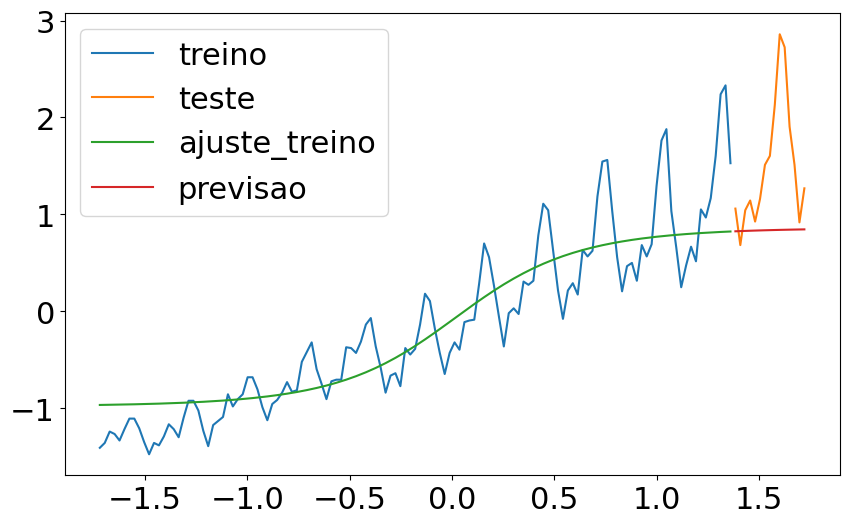

In [127]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
sns.lineplot(x=x_treino, y=y_predict[:, 0], label='ajuste_treino')
sns.lineplot(x=x_teste, y=y_predict_teste[:, 0], label='previsao')

In [128]:
vetor = pd.DataFrame(y_treino)[0]

In [129]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [130]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [131]:
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [132]:
y_treino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [133]:
vetor2 = pd.DataFrame(y_teste)[0]

In [134]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [135]:
regressor3 = Sequential()

In [136]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [137]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [138]:
regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 0.7661
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7454
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7248
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7021
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6814
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6532
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6276
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5984
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5673
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5328
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4973
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4578
Epoch 13/100
4/4 [==============================] - 0s 4ms

In [139]:
y_predict_novo = regressor3.predict(x_treino_novo)

4/4 [==============================] - 0s 8ms/step


<Axes: xlabel='tempo', ylabel='0'>

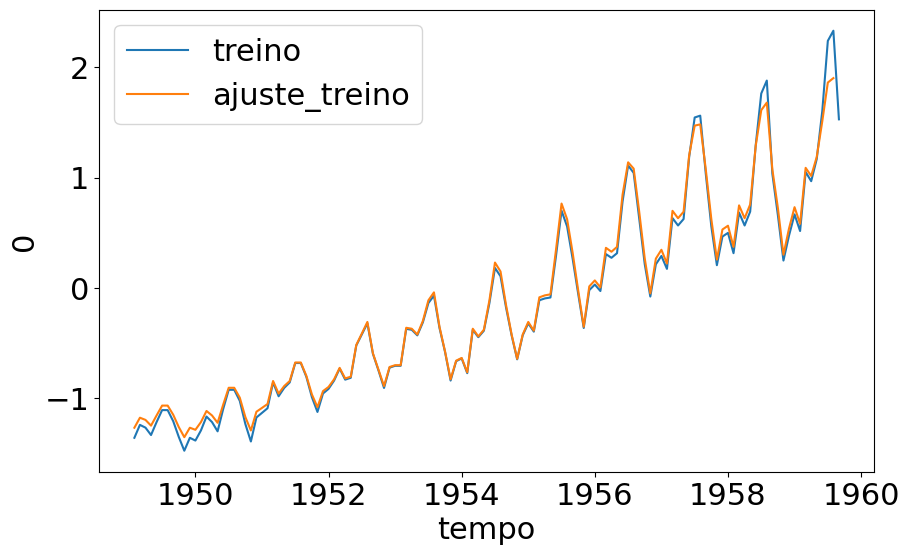

In [140]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [141]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)

1/1 [==============================] - 0s 48ms/step


In [142]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

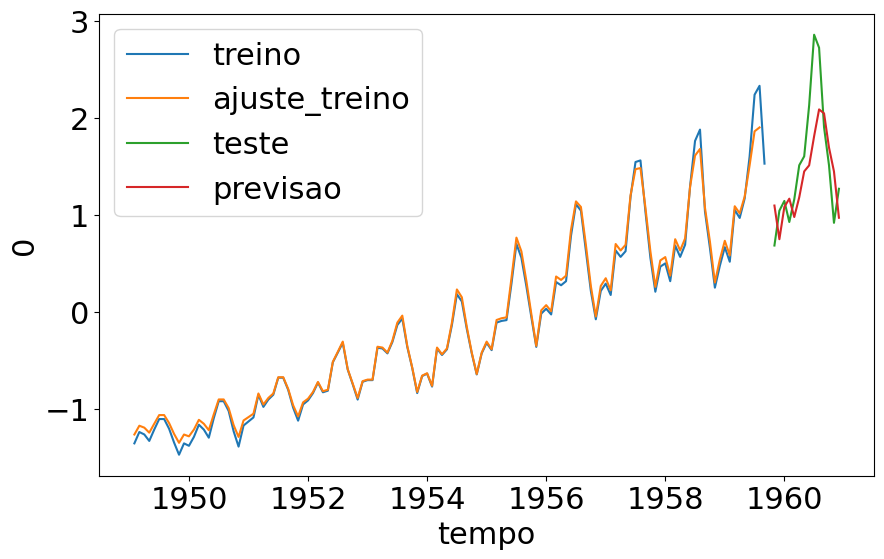

In [143]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsao')

In [144]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

In [145]:
x_treino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [146]:
y_treino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [147]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

In [148]:
regressor4 = Sequential()

In [149]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [150]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [151]:
regressor4.fit(x_treino_novo, y_treino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 6ms/step - loss: 0.7604
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.6684
Epoch 3/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5961
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5314
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4646
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4074
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3456
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2923
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2421
Epoch 10/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2074
Epoch 11/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1801
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1594
Epoch 13/300
4/4 [==============================] - 0s 5ms/st

In [152]:
y_predict_novo = regressor4.predict(x_treino_novo)

4/4 [==============================] - 0s 5ms/step


In [153]:
y_predict_teste_novo = regressor4.predict(x_teste_novo)

1/1 [==============================] - 0s 37ms/step


In [154]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [155]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

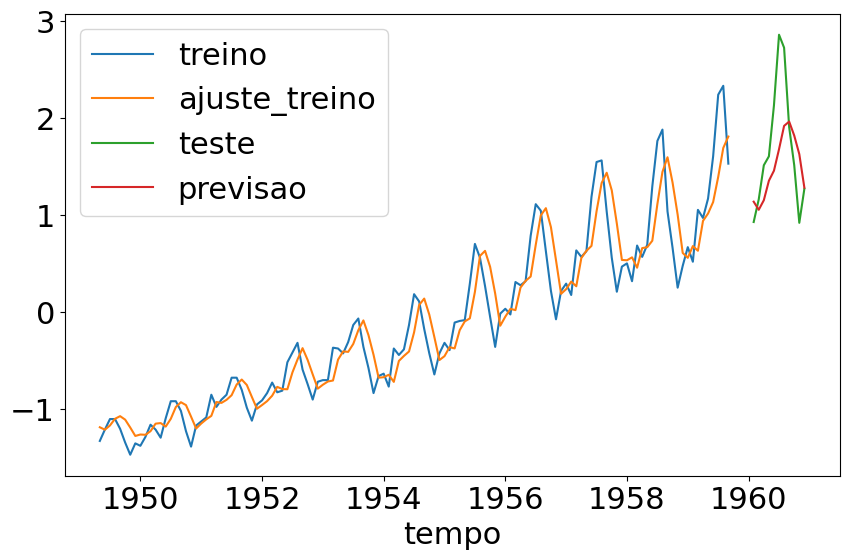

In [156]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsao')

In [157]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')

In [158]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [159]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

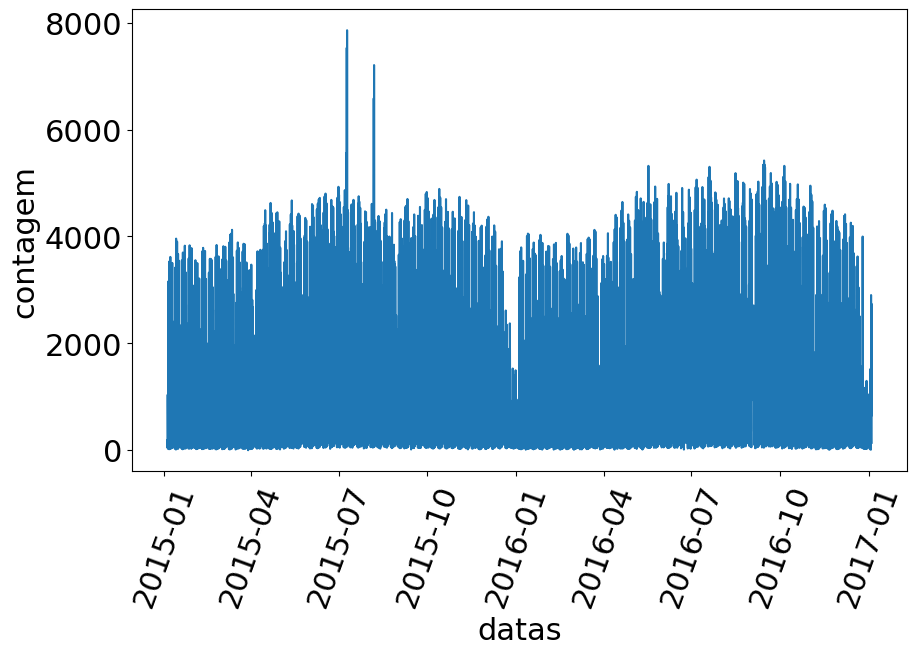

In [160]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [161]:
sc2 = StandardScaler()

In [162]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [163]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [164]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike)-tamanho_treino

In [165]:
y_treino = y[0:tamanho_treino]

In [166]:
y_teste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

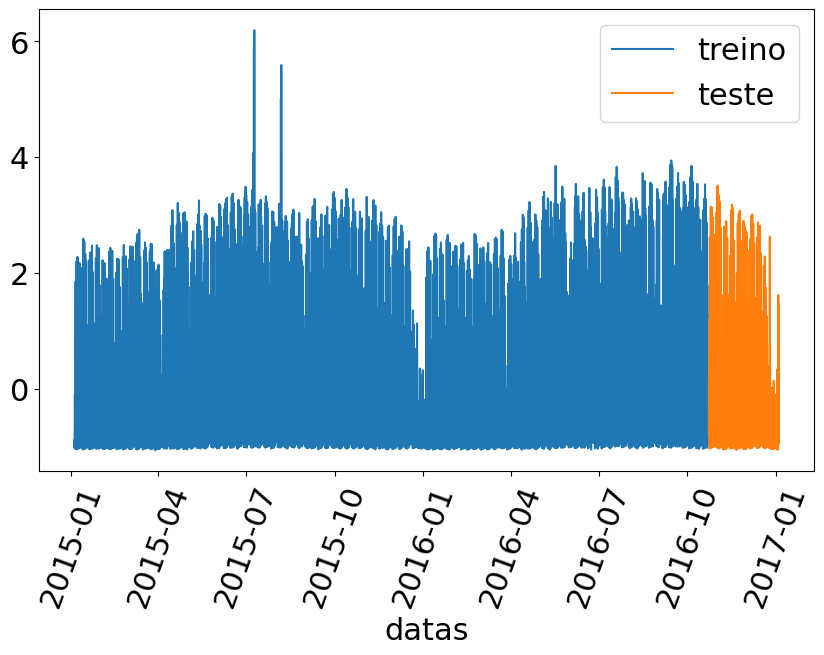

In [167]:
sns.lineplot(x='datas', y=y_treino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_teste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [168]:
vetor = pd.DataFrame(y_treino)[0]

In [169]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 10)

In [170]:
x_treino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [171]:
vetor2 = pd.DataFrame(y_teste)[0]

In [172]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

In [174]:
x_treino_novo = x_treino_novo.reshape(x_treino_novo.shape[0], x_treino_novo.shape[1], 1)

In [176]:
x_teste_novo = x_teste_novo.reshape((x_teste_novo.shape[0], x_teste_novo.shape[1], 1))

In [177]:
recorrente = Sequential()

In [181]:
recorrente.add(LSTM(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [185]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [186]:
recorrente.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
resultado = recorrente.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 16s 27ms/step - loss: 0.2881 - val_loss: 0.1044
Epoch 2/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0848 - val_loss: 0.0506
Epoch 3/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0560 - val_loss: 0.0452
Epoch 4/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0477 - val_loss: 0.0286
Epoch 5/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0434 - val_loss: 0.0334
Epoch 6/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0411 - val_loss: 0.0305
Epoch 7/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0386 - val_loss: 0.0265
Epoch 8/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0371 - val_loss: 0.0236
Epoch 9/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0356 - val_loss: 0.0219
Epoch 10/100
490/490 [==============================] - 8s 17ms/step - loss: 0.

In [188]:
y_ajustado = recorrente.predict(x_treino_novo)

490/490 [==============================] - 7s 13ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

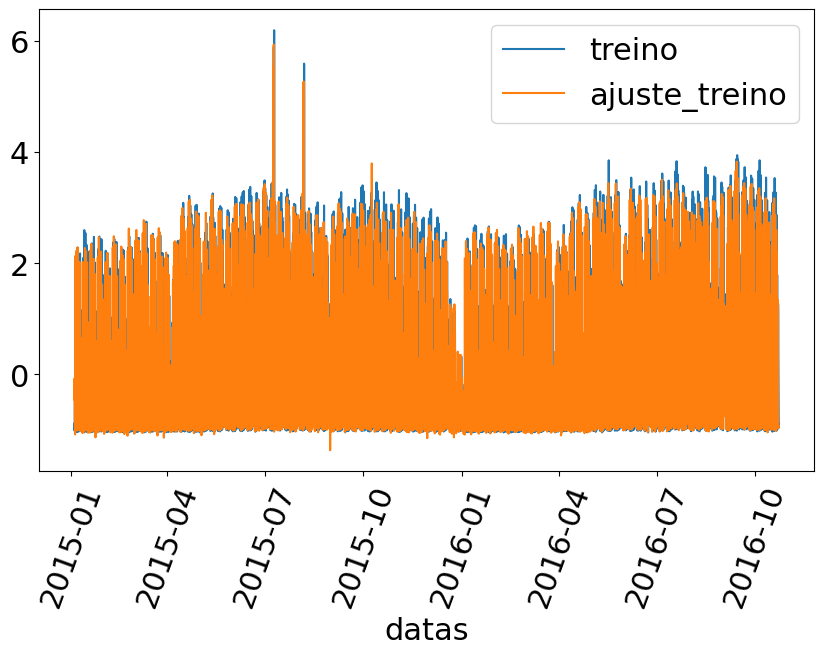

In [190]:
sns.lineplot(x='datas', y=y_treino[:, 0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:, 0], data=bike[0:15662], label='ajuste_treino')
plt.xticks(rotation=70)

In [193]:
y_predito = recorrente.predict(x_teste_novo)

55/55 [==============================] - 1s 10ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

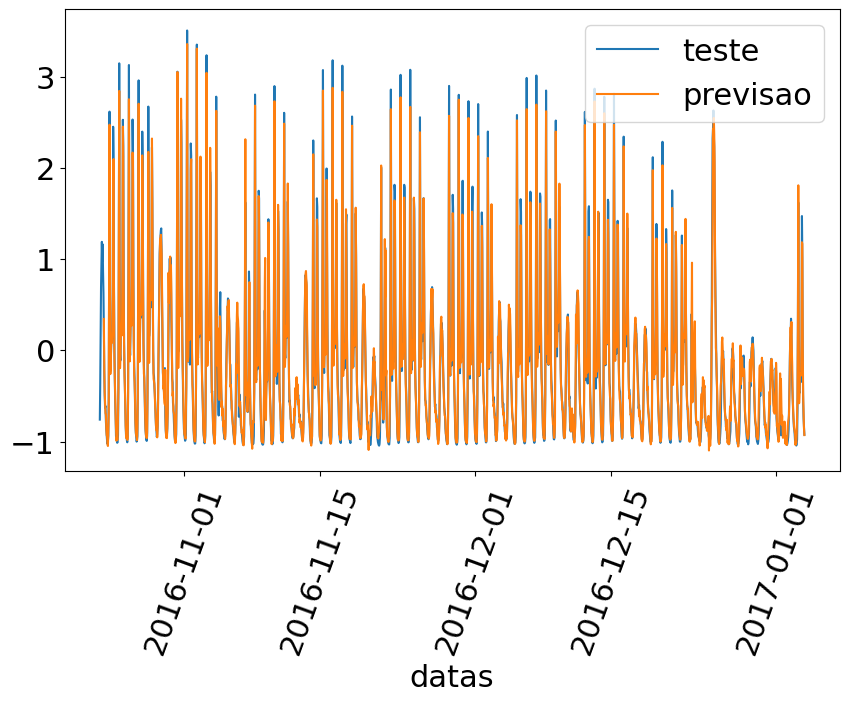

In [197]:
sns.lineplot(x='datas', y=y_teste[:, 0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito[:, 0], data=bike[tamanho_treino+10:len(bike)], label='previsao')
plt.xticks(rotation=70)

In [213]:
recorrente_g = Sequential()

In [214]:
recorrente_g.add(GRU(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [215]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [216]:
recorrente.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [217]:
recorrente_g.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 128)               50304     
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [218]:
resultado2 = recorrente_g.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 9s 14ms/step - loss: 0.2196 - val_loss: 0.0860
Epoch 2/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0685 - val_loss: 0.0369
Epoch 3/100
490/490 [==============================] - 7s 13ms/step - loss: 0.0493 - val_loss: 0.0301
Epoch 4/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0425 - val_loss: 0.0241
Epoch 5/100
490/490 [==============================] - 8s 15ms/step - loss: 0.0386 - val_loss: 0.0322
Epoch 6/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0362 - val_loss: 0.0197
Epoch 7/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0349 - val_loss: 0.0200
Epoch 8/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0335 - val_loss: 0.0192
Epoch 9/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0323 - val_loss: 0.0181
Epoch 10/100
490/490 [==============================] - 7s 14ms/step - loss: 0.031

In [219]:
y_predito2 = recorrente_g.predict(x_teste_novo)

55/55 [==============================] - 1s 6ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

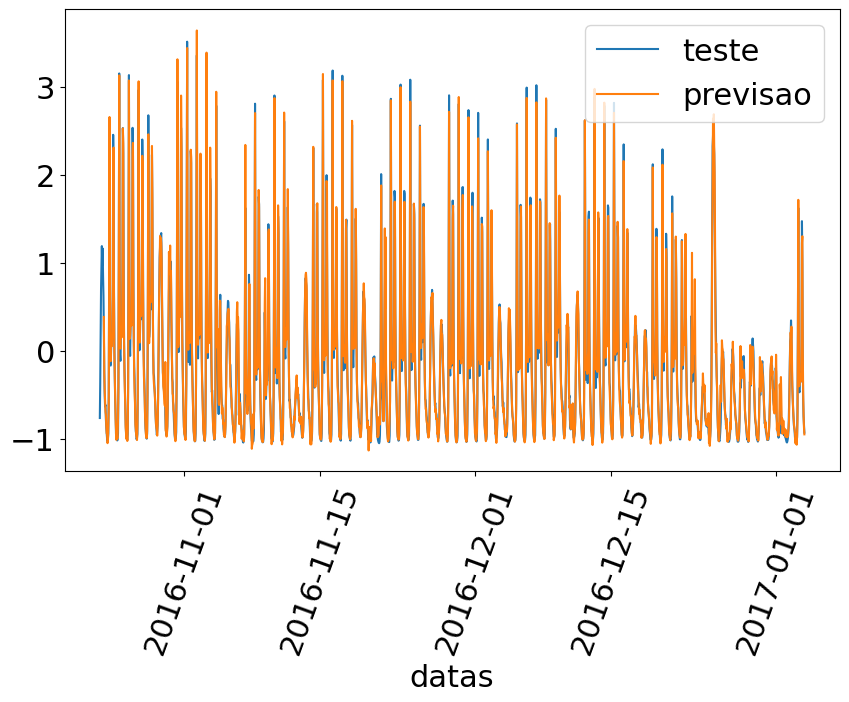

In [220]:
sns.lineplot(x='datas', y=y_teste[:, 0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:, 0], data=bike[tamanho_treino+10:len(bike)], label='previsao')
plt.xticks(rotation=70)

In [222]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'Custo')

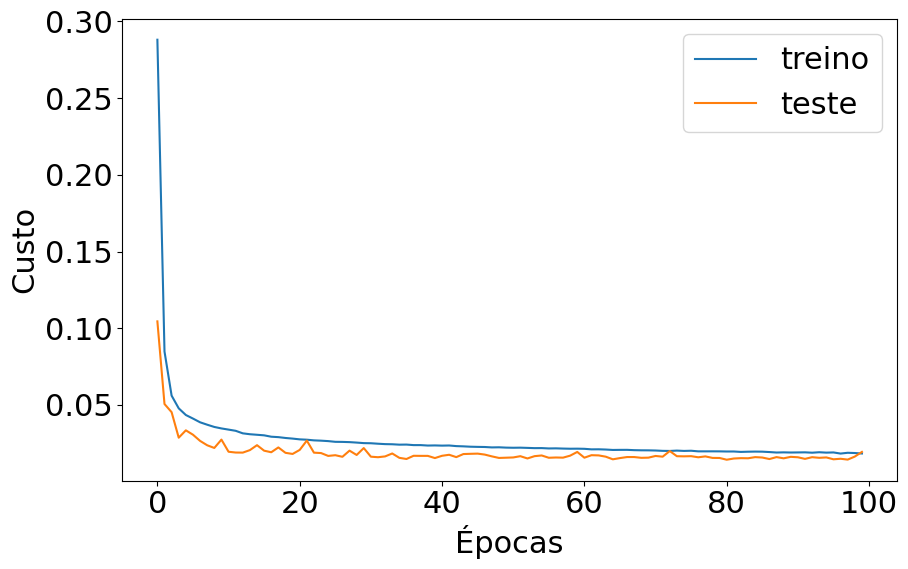

In [225]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')

Text(0, 0.5, 'Custo')

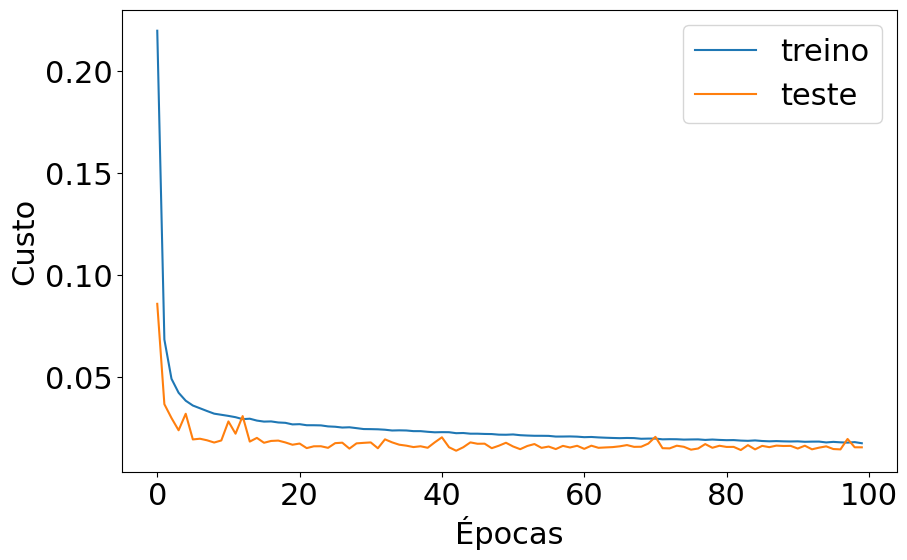

In [226]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')